# Intensive Care Unit Patients Dataset
This dataset contains information for a sample of 200 patients who were part of a larger study conducted in a hospital's Intensive Care Unit (ICU). Since an ICU often deals with serious, life-threatening cases, a key variable to study is patient survival, which is coded in the Survive variable as 1 if the patient lived to be discharged and 0 if the patient died.



# Objectives:
- Investigate potential patterns of ICU who lived and died.
- Carry out hypothesis testing for interested observations.

In [4]:
import pandas as pd
health = pd.read_csv('ICU.csv.txt')
health.head() #View the inital of the data

#Note:
## Continuous variables: SysBP = Systolic blood pressure (in mm of Hg); Age; Pulse
## Categorical variables: Survive, Sex (1 female, 0 male), Infection, Emergency (1=emergency admission or 0=elective admission)

,Unnamed: 0,ID,Survive,Age,AgeGroup,Sex,Infection,SysBP,Pulse,Emergency
0,1,4,0,87,3,1,1,80,96,1
1,2,8,1,27,1,1,1,142,88,1
2,3,12,1,59,2,0,0,112,80,1
3,4,14,1,77,3,0,0,100,70,0
4,5,27,0,76,3,1,1,128,90,1


### Data explore: Finding the missing nature of the data



In [31]:

health.isnull().sum()
##There is no missing value in this dataset


Unnamed: 0    0
ID            0
Survive       0
Age           0
AgeGroup      0
Sex           0
Infection     0
SysBP         0
Pulse         0
Emergency     0
dtype: int64

### Understanding the survivor nature of ICU patients on Age & Gender

In [64]:
health.Survive.groupby(health.Sex).sum()
health[(health['Survive'] == 1) & (health['Sex'] == 1)].shape #60 Female survivors


(60, 10)

In [63]:
health[(health['Survive'] == 1) & (health['Sex'] == 0)].shape

 #100 Male survivors


(100, 10)

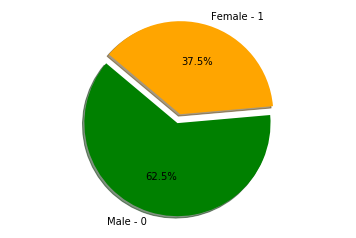

In [68]:
# Visualize the distribution of Male and Female survivors in a piechart
plt.pie(health.Survive.groupby(health.Sex).sum(), explode=(0,0.1), labels=['Male - 0', "Female - 1"], colors=['green', 'orange'],
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

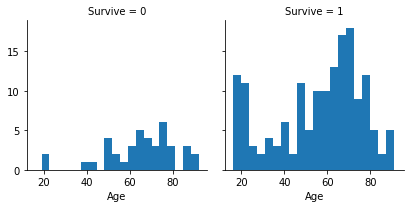

In [72]:
#Distribution of Survival Age-wise
import seaborn as sns
g = sns.FacetGrid(health, col='Survive')
g.map(plt.hist, 'Age', bins=20)

#The majority of non-survivors are above 40 years old while survivors

In [79]:
health.Age.groupby(health.Survive).mean() #Grouping by "survive" status to see the mean 
#Non-survivors are older than survivors

Survive
0    65.125
1    55.650
Name: Age, dtype: float64

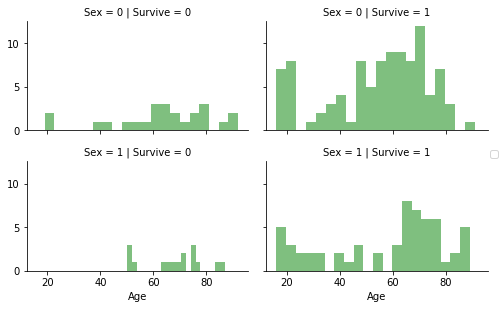

In [75]:
#Survival age based on gender 
grid = sns.FacetGrid(health, col='Survive', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20, color = 'green')
grid.add_legend()

### Hypothesis testing on the effect of age on survival rate
- As age seems to be a good predictor for the survival status, I'll conduct a hypothesis testing.
    - Null hypothesis: Ho: Ma = Md (Mean age of survivors are the same as non-survivors)
    - Alternative hypothesis: H1: Ma != Md (Mean age of survivors are different from non-survivors)

- Type of hypothesis test: Independent sample t-test as it is assumed that patients are independent from one another.

In [114]:
import scipy.stats as stats

alive_age = health[health['Survive'] == 1]['Age']
dead_age = health[health['Survive'] == 0]['Age']

N_alive = len(alive_age)
N_dead = len(dead_age)

d_alive = N_alive -1
d_dead = N_dead -1

s_alive = np.std(alive_age,ddof=1)
s_dead = np.std(dead_age, ddof=1)

mean_alive = np.mean(x1)
mean_dead = np.mean(x2)

sp = np.sqrt((d_alive*s_alive**2 + d_dead*s_dead**2)/df) #pooled variance
se = sp*np.sqrt(1/N_alive+ 1/N_dead)   #standard error
t = (mean_dead - mean_alive)/(se) #t statistics
print("t-statistic", t)

# a two-sample independent t-test is done with scipy as follows
# NOTE: the p-value given is two-sided so the one-sided p value would be p/2
t, p_twosided = stats.ttest_ind(alive_age, dead_age, equal_var=True)
print("t = ",t, ", p_twosided = ", p_twosided, ", p_onesided =", p_twosided/2)

###As p-value <0.05, the difference between survor and non-survivor age is statistically significant.
#### People who died are older than people who were alive.


t-statistic -0.188353179044941
t =  -2.715081584337194 , p_twosided =  0.007211348955504813 , p_onesided = 0.0036056744777524063


### Understanding the survival nature of ICU patients based on Continuous variables

Survive
0    65.125
1    55.650
Name: Age, dtype: float64

In [5]:
health.groupby('Survive').mean() #Grouping by "survive" status to see the mean 
                                #Focused continuous variables: Age, SysBP and Pulse
#The initial observation is that non-survivors are of older age, lower SysBP and Pulse -> Hypothesis test later.

,Unnamed: 0,ID,Age,AgeGroup,Sex,Infection,SysBP,Pulse,Emergency
Survive,,,,,,,,,
0,90.4500,395.9500,65.125,2.325,0.400,0.600,118.82500,100.625,0.95000
1,103.0125,457.0375,55.650,1.950,0.375,0.375,135.64375,98.500,0.68125


In [9]:
#Bargraph dead vs survive regarding SysBP
import matplotlib.pyplot as plt
import numpy as np


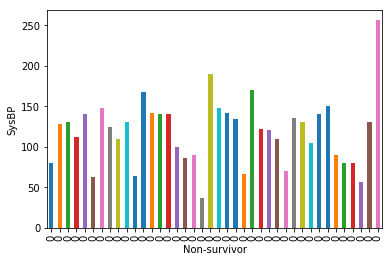

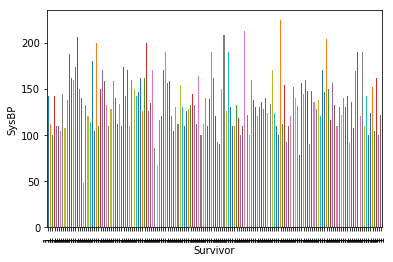

In [28]:

dead = health[(health['Survive'] == 0)] #dead is the subset of non-survivors
dead.set_index('Survive')['SysBP'].plot.bar() 

plt.ylabel('SysBP')
plt.xlabel('Non-survivor')
plt.show()


alive = health[(health['Survive'] == 1)] #subset of survivors
alive.set_index('Survive')['SysBP'].plot.bar() 

plt.ylabel('SysBP')
plt.xlabel('Survivor')
plt.show()
#There are more survivors than non-survivors



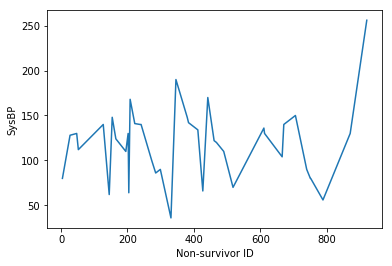

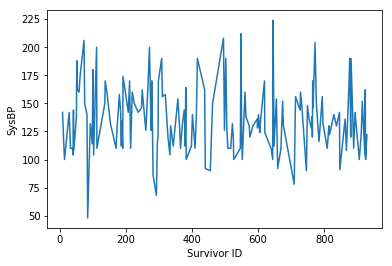

In [29]:
df_plot = dead.set_index('ID')['SysBP'].plot.line()
plt.ylabel('SysBP')
plt.xlabel('Non-survivor ID')
plt.show()

df_plot = alive.set_index('ID')['SysBP'].plot.line()
plt.ylabel('SysBP')
plt.xlabel('Survivor ID')
plt.show()